# Data Visualization
EDA: exploratory data analysis
1. Compute summary stats
1. Generate data visualizations

## Goals of Data Vis
1. Clearly and accurately represent data
1. Be creative, with the goal of increading readability
1. Label units, axes, and points of interests

## Some Jargon
Chart: 2D visualization
* Plot: a chart of data points (e.g. scatter plot)
* Graph: a chart of a mathematical function (e.g. sine curve)

## Ways to use Matplotlib
1. Use the pyplot module: like a state machine (e.g. there is always a "current figure")
1. Use the OOP interface: maintain object references
1. Mix of the two

# Matplotlib Chart Examples
## Line Chart Example

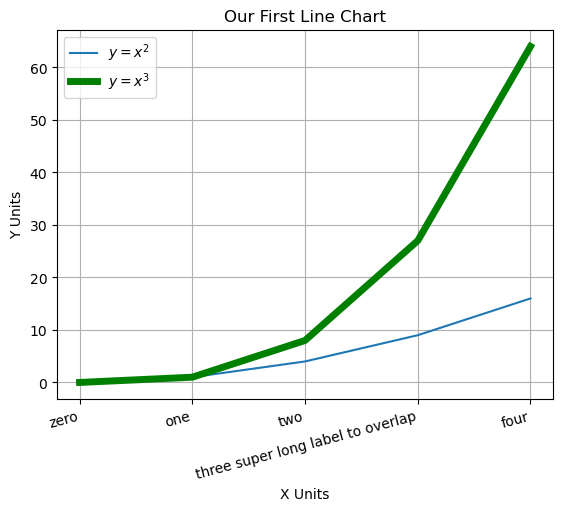

In [2]:
import matplotlib.pyplot as plt 

def line_chart_example(x, y, y3):
    plt.figure() # create a new "current figure"
    plt.plot(x, y, label="$y=x^2$")
    # plt.figure()
    plt.plot(x, y3, c="green", lw=5, label="$y=x^3$")
    # add some labels
    plt.legend()
    plt.title("Our First Line Chart")
    plt.xlabel("X Units")
    plt.ylabel("Y Units")
    plt.grid(True)
    # customize the x tick locations and labels
    xtick_labels = ["zero", "one", "two", "three super long label to overlap", "four"]
    plt.xticks(x, xtick_labels, rotation=15, ha="right")
    plt.show()

# we need some data
x = list(range(5))
y2 = [val ** 2 for val in x]
# task: add another to the figure for y = x^3
y3 = [val ** 3 for val in x]
line_chart_example(x, y2, y3)

## Bar Charts

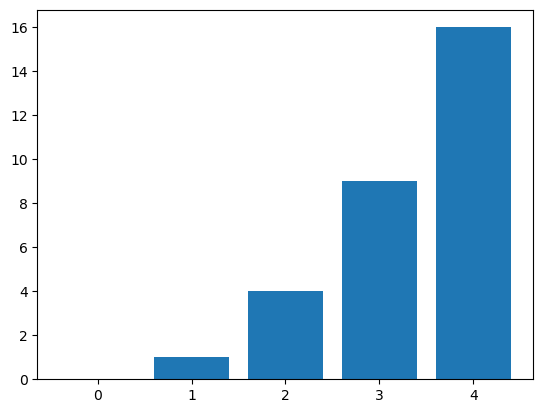

In [3]:
def bar_chart_example(x, y):
    plt.figure()
    plt.bar(x, y)
    plt.xticks(x)
    plt.show()
    
# back to y=x^2
x = list(range(5))
y = [value ** 2 for value in x]
bar_chart_example(x, y)

## Pie Charts

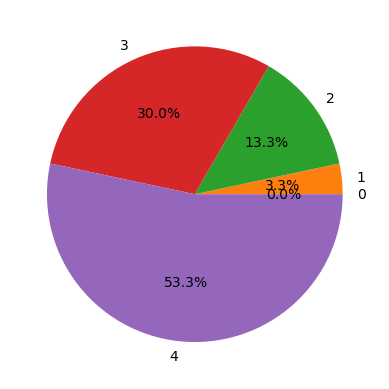

In [4]:
def pie_chart_example(x, y):
    plt.figure()
    plt.pie(y, labels=x, autopct="%1.1f%%")
    plt.show()
    
pie_chart_example(x, y)

## Histograms

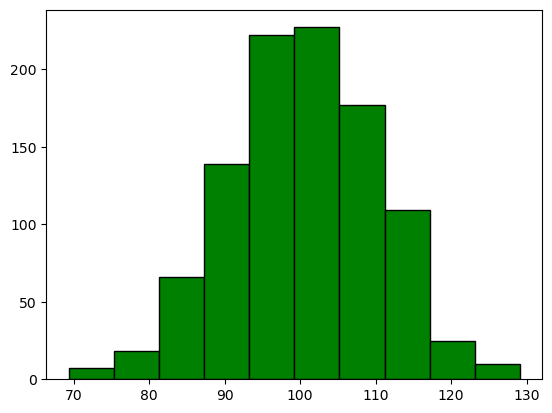

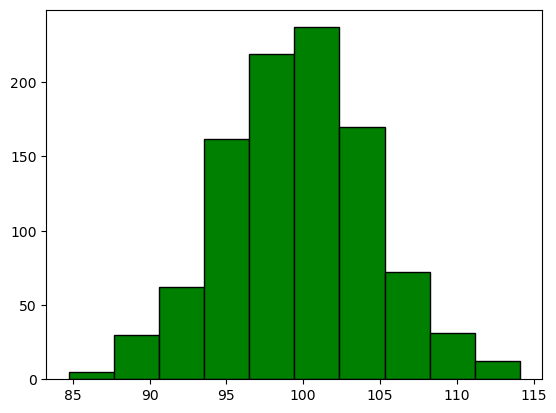

In [5]:
import numpy as np
def histogram_example(data):
    # data is a 1D list of data values
    plt.figure()
    plt.hist(data, bins=10, facecolor="green", edgecolor="black") # default is 10
    plt.show()
    
# let's generate some random "normal" data
mean = 100 # mu
stdev = 10 # sigma 
num_samples = 1000 
normal_data = np.random.normal(mean, stdev, num_samples)
histogram_example(normal_data)

warmup_mean = 100
warmup_std = 5
warmup_data = np.random.normal(warmup_mean, warmup_std, num_samples)
histogram_example(warmup_data)

## Scatter Charts
Plus saving a chart to a file (e.g. PDF, PNG, etc.)

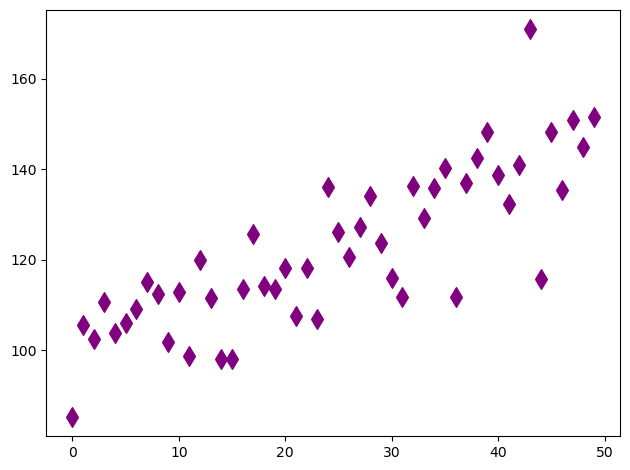

In [6]:
import numpy as np

def scatter_chart_example(x, y):
    plt.figure() # make a new current figure
    plt.scatter(x, y, marker="d",s=100, c="purple")

    # you can save a figure to a file
    plt.tight_layout() # nice function to call right before rendering
    plt.savefig("scatter_chart.pdf")
    plt.show()
    
# we need data    
x = list(range(50))
y = [np.random.normal(100, 10) + value for value in x]
scatter_chart_example(x, y)

## Box Plots

C:\Users\jacko\AppData\Local\Temp\ipykernel_2668\2175713695.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(distributions, labels = labels)


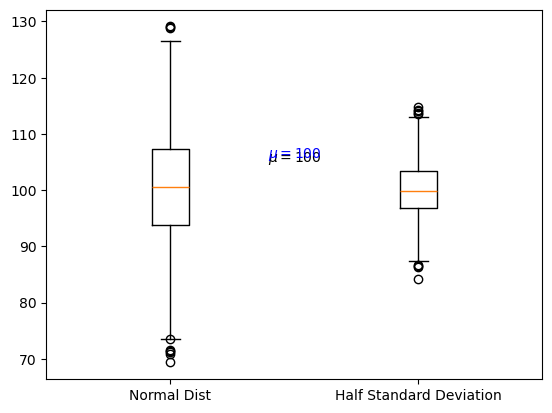

In [13]:
def box_plot_example(distributions, labels): # distributions and labels are parallel
    # distributions: list of 1D lists of values
    plt.figure()
    plt.boxplot(distributions, labels = labels)
    
    # boxes correspond to the 1st and 3rd quartiles
    # line in the middle of the box corresponds to the 2nd quartile (AKA median)
    # whiskers corresponds to +/- 1.5 * IQR
    # IQR: interquartile range (3rd quartile - 1st quartile)
    # circles outside the whiskers correspond to outliers
    
    # annotations
    # we want to add "mu=100" to the center of our figure
    # xycoords="data": default, specify the location of the label in the same scale as the plot's x and y axes
    # xycoords = "axes fraction": specify the location of the label in absolute
    # axes coordinates... 0,0 is the lower left corner, 1,1 is the upper right corner
    # coordinates as the plotted data
    plt.annotate(r"$\mu=100$", xy=(1.5, 105), xycoords="data", horizontalalignment="center")
    plt.annotate(r"$\mu=100$", xy=(0.5, 0.6), xycoords="axes fraction", 
                 horizontalalignment="center", color="blue")
    plt.show()
    
normal_data2 = np.random.normal(mean, stdev / 2, num_samples)
box_plot_example([normal_data, normal_data2], ["Normal Dist", "Half Standard Deviation"])

## Data Viz Warm-up Task 1 (9/26)
1. In utils.py, write a function that returns the frequencies (occurrence counts) of values for a table's (categorical) attribute.
    * Example: The call `get_frequencies(msrp_table, msrp_header, "ModelYear")` for the `msrp_table` and `msrp_header` should return the parallel list: `[75, 76, 77]` and `[2, 1, 1]`
    * Note: It would be good to add a few more rows to `msrp_table` for testing
    * Then, create a bar and a pie chart for the model year counts
1. Add another histogram with mean=100, stdev=5 to the same histogram figure
    1. New histogram narrower or wider than the original (blue)?
1. Add a parameter to `box_plot_example()` called `labels`
    1. `labels` is a 1D list of x-axis labels. Replace the 1 and 2 on the x axis `labels`
    1. Call `box_plot_example()` passing in descriptions for the 2 distributions

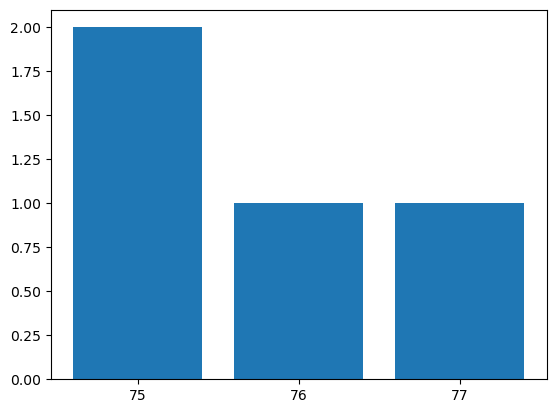

In [8]:
import utils
import importlib
importlib.reload(utils)

msrp_header = ["CarName", "ModelYear", "MSRP"]
msrp_table = [["ford pinto", 75, 2769],
            ["toyota corolla", 75, 2711],
            ["ford pinto", 76, 3025],
            ["toyota corolla", 77, 2789]]
modelyear_values, modelyear_counts = utils.get_frequencies(msrp_table, msrp_header, "ModelYear")
bar_chart_example(modelyear_values,modelyear_counts)


## Data Viz Task 2: Group By (9/29)

Typically, to create a list of distributions, you will perform a "group by" operation. A group by operation is grouping (or partitioning) rows or attributes values by another attribute value. For example, grouping by `ModelYear` would put all the cars from 1975 in one list, all cars from 1976 in another, and so on.

Now, in `utils.py`:

1. Write a `group_by` function that takes:
   - `table` (list of rows)
   - `header` (list of column names)
   - `group_by_col_name` (the column to group by)

The function should return the grouped rows in a structure that makes it easy to access each group (for example, a dictionary with the attribute values as keys, or a list of tables with corresponding labels).

2. Test your function on the `ModelYear` column:
   - Add a few more rows to `msrp_table` to make the grouping more interesting

3. Visualize the grouped data:
   - Extract the `MSRP` values for each group
   - Make a box-and-whisker plot with:
     - **x-axis:** ModelYear
     - **y-axis:** MSRP
   - Each box should show the distribution of MSRP for that year


{75: [['ford pinto', 75, 2769], ['toyota corolla', 75, 2711]], 76: [['ford pinto', 76, 3025]], 77: [['toyota corolla', 77, 2789]]}
[75, 76, 77] [[2769, 2711], [3025], [2789]]


C:\Users\jacko\AppData\Local\Temp\ipykernel_2668\2175713695.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(distributions, labels = labels)


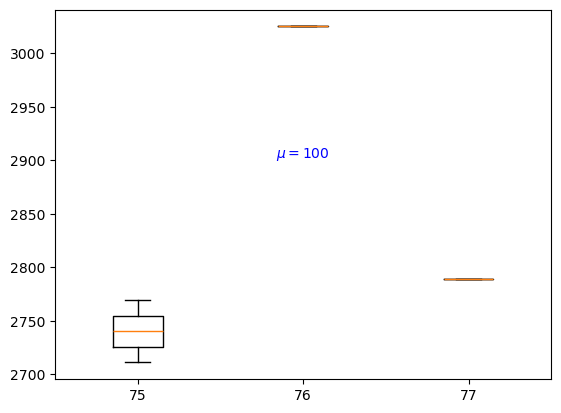

In [17]:
import utils
import importlib
importlib.reload(utils)

msrp_header = ["CarName", "ModelYear", "MSRP"]
msrp_table = [["ford pinto", 75, 2769],
            ["toyota corolla", 75, 2711],
            ["ford pinto", 76, 3025],
            ["toyota corolla", 77, 2789]]

grouped_data=utils.group_by(msrp_table,msrp_header,"ModelYear")

print(grouped_data)        
years = list(grouped_data.keys())
count = [[row[2] for row in grouped_data[year]] for year in years]
print(years, count)

box_plot_example(count, years)